In [1]:
%%capture --no-display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from scipy import stats 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("battery_ml (1).csv")
dataset.head()

,Unnamed: 0,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,...,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2,cycle_life
0,0,-0.008460,-0.002873,0.000010,-0.532058,-1.348312,-0.000214,1.091381,1.070689,1.075913,...,0.000046,1.071447,13.374894,31.632496,31.266918,18.742036,0.016742,0.0,-0.000075,1852
1,1,-0.011004,-0.004100,0.000010,-0.429375,-1.029116,0.000007,1.080926,1.075301,1.080630,...,-0.000037,1.084382,13.409150,31.376623,31.076239,19.743747,0.017039,0.0,-0.000042,2160
2,2,-0.017216,-0.004487,0.000018,-1.080194,0.348637,0.000011,1.084805,1.079922,1.084940,...,-0.000040,1.088961,13.358242,31.447081,31.146742,19.985985,0.016868,0.0,-0.000014,2237
3,3,-0.018961,-0.007456,0.000036,-0.439050,-1.095416,0.000018,1.084030,1.079723,1.084750,...,-0.000002,1.084960,12.025140,29.982986,29.857000,18.640968,0.016370,0.0,0.000039,1434
4,4,-0.013958,-0.005750,0.000023,-0.362548,-1.333831,0.000020,1.081825,1.078417,1.082646,...,-0.000034,1.085988,12.041851,31.433310,31.181360,21.154489,0.016787,0.0,-0.000053,1709


In [3]:
dataset["cycle_life"]


0      1852
1      2160
2      2237
3      1434
4      1709
       ... 
119    1156
120     796
121     786
122     940
123    1801
Name: cycle_life, Length: 124, dtype: int64

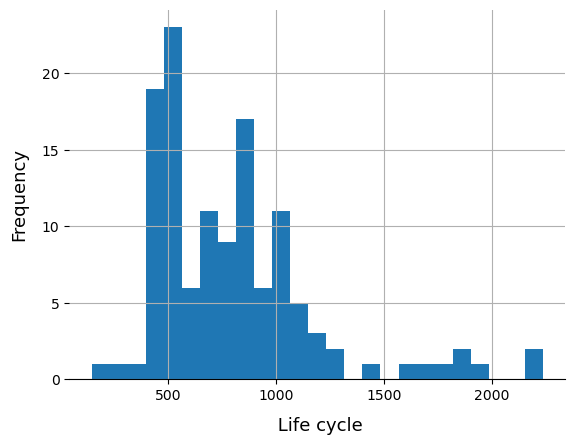

In [4]:
ax=dataset.hist(column='cycle_life',bins=25)
ax = ax[0] 
for x in ax:
    x.set_title("")
    x.set_xlabel(" Life cycle", labelpad=10, size=13)
    x.set_ylabel("Frequency", labelpad=10, size=13)

    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

In [5]:
import seaborn as sns

C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\2787820880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['cycle_life'],bins=25,kde=True,color='k')


<Axes: xlabel='cycle_life', ylabel='Density'>

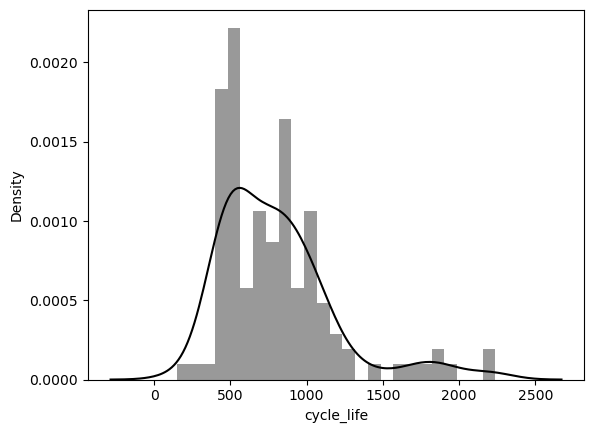

In [6]:
sns.distplot(dataset['cycle_life'],bins=25,kde=True,color='k')

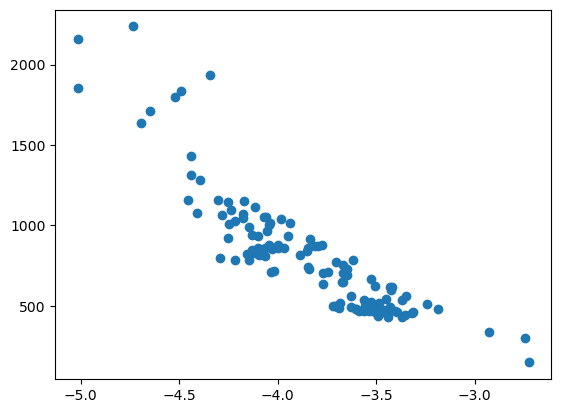

In [7]:
#dq_variance
plt.scatter(np.log10(dataset['dq_variance']),dataset['cycle_life'])


In [8]:
np.corrcoef(np.log10(dataset['dq_variance']),dataset['cycle_life'])

array([[ 1.        , -0.88974274],
       [-0.88974274,  1.        ]])

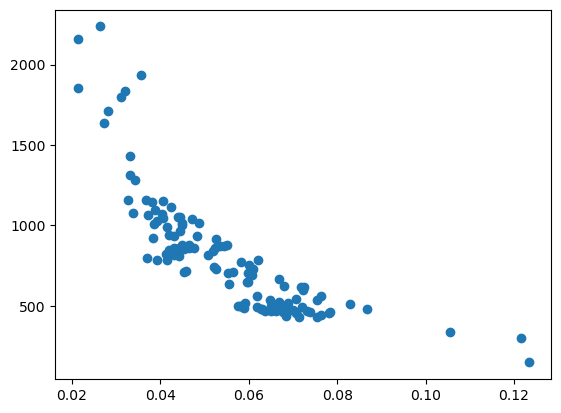

In [9]:
plt.scatter(np.cbrt(dataset['dq_variance']),dataset['cycle_life'])

In [10]:
np.corrcoef(np.cbrt(dataset['dq_variance']),dataset['cycle_life'])

array([[ 1.        , -0.80846817],
       [-0.80846817,  1.        ]])

In [11]:
#plt.scatter(np.log(dataset['dq_variance']),np.log10(dataset['cycle_life']))

In [12]:
#plt.scatter(((dataset['dq_variance']-np.mean(dataset['dq_variance'])/np.std(dataset['dq_variance']))),np.log10(dataset['cycle_life']))

In [13]:
print("*********** Original data*******************")
print(dataset['cycle_life'].describe())
print("skew : ",skew(dataset['cycle_life']))
print("kurt : ",kurtosis(dataset['cycle_life']))

*********** Original data*******************
count     124.000000
mean      801.637097
std       379.717082
min       148.000000
25%       498.750000
50%       736.500000
75%       946.500000
max      2237.000000
Name: cycle_life, dtype: float64
skew :  1.5722118774617826
kurt :  2.9001076537372352


In [14]:
#Selecting Features and Target,  X1=features, Y1=Target
X1=dataset.drop(["cycle_life",'Unnamed: 0'],axis=1)

In [15]:
X1

,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,diff_QD_n_2,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2
0,-0.008460,-0.002873,0.000010,-0.532058,-1.348312,-2.137460e-04,1.091381,1.070689,1.075913,0.468365,0.000046,1.071447,13.374894,31.632496,31.266918,18.742036,0.016742,0.000000,-0.000075
1,-0.011004,-0.004100,0.000010,-0.429375,-1.029116,6.676023e-06,1.080926,1.075301,1.080630,0.009288,-0.000037,1.084382,13.409150,31.376623,31.076239,19.743747,0.017039,0.000000,-0.000042
2,-0.017216,-0.004487,0.000018,-1.080194,0.348637,1.149798e-05,1.084805,1.079922,1.084940,0.008131,-0.000040,1.088961,13.358242,31.447081,31.146742,19.985985,0.016868,0.000000,-0.000014
3,-0.018961,-0.007456,0.000036,-0.439050,-1.095416,1.846790e-05,1.084030,1.079723,1.084750,0.006530,-0.000002,1.084960,12.025140,29.982986,29.857000,18.640968,0.016370,0.000000,0.000039
4,-0.013958,-0.005750,0.000023,-0.362548,-1.333831,2.046078e-05,1.081825,1.078417,1.082646,0.005900,-0.000034,1.085988,12.041851,31.433310,31.181360,21.154489,0.016787,0.000000,-0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.017458,-0.006428,0.000035,-0.292539,-1.003013,-5.631454e-06,1.050886,1.047404,1.049504,0.004107,-0.000005,1.050216,10.043833,34.218964,33.899652,51.489886,0.015741,0.015481,-0.000155
120,-0.022054,-0.009079,0.000051,-0.315431,-1.138513,-6.625013e-06,1.063355,1.059324,1.061757,0.004510,-0.000042,1.066049,10.043563,33.911189,32.981926,66.841951,0.015562,0.014996,-0.000234
121,-0.024193,-0.009748,0.000060,-0.357134,-1.063130,1.066398e-05,1.053846,1.050522,1.054153,0.004362,-0.000057,1.059706,10.042974,33.621746,32.648149,72.070386,0.018542,0.017007,-0.000173
122,-0.025985,-0.011231,0.000074,-0.244616,-1.238396,5.494642e-06,1.073051,1.069720,1.072928,0.004185,-0.000028,1.075614,10.043436,33.111576,32.626095,64.641417,0.015723,0.015505,-0.000106


In [16]:
X1=X1[['dq_variance']]

In [17]:
X1

,dq_variance
0,0.000010
1,0.000010
2,0.000018
3,0.000036
4,0.000023
...,...
119,0.000035
120,0.000051
121,0.000060
122,0.000074


In [18]:
export=pd.concat([X1,dataset["cycle_life"]],axis=1)

In [19]:
export.to_csv('sisso.csv',sep=' ')

In [20]:
X1['dq_variance']=np.log10(X1['dq_variance'])

C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\3541331533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['dq_variance']=np.log10(X1['dq_variance'])


In [21]:
#X1 = preprocessing.scale(X1)

In [22]:
Y1=dataset["cycle_life"]

In [23]:
#Y1=Y.apply(lambda x: np.sqrt(x))
#Y1=Y.apply(lambda x: x**(1/3))
#Y1=Y.apply(lambda x: np.log(x))
#Y1=Y.apply(lambda x: x**(-0.375))
#Y1=Y
#Y1.hist(bins=20)
#print("*********** Original data*******************")
#print(Y1.describe())
#print("skew : ",skew(Y1))
#print("kurt : ",kurtosis(Y1))

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X1[0:83], Y1[0:83],
                                                    test_size = 0.4, random_state=1000)

In [25]:
#X_train=X1[0:40]
#Y_train=Y1[0:40]

In [26]:
#X_test=X1[41:83]
#Y_test=Y1[41:83]

In [27]:
X_val=X1[84:123]
Y_val=Y1[84:123]

# Regression with ElasticNet

In [28]:
model=ElasticNet()

In [29]:
model.fit(X_train,Y_train)

ElasticNet()

In [30]:
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 272.7132492879641
R2 score is 0.3599375169668414


In [31]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 329.45745982374905
R2 score is 0.2800937364141559


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\2881953538.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


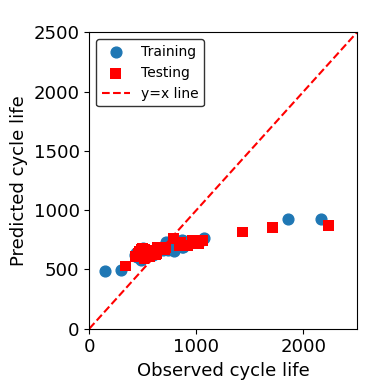

In [32]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
# plt.xticks(np.linspace(0,2,0.5,endpoint=True))
plt.ylim((0,2500))
# plt.yticks(np.linspace(0,2,0.5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Testing',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
plt.tight_layout()
leg = plt.legend()
leg.get_frame().set_edgecolor('black')

In [33]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 357.3002769035605
R2 score is -0.6021808065182017


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\3761464373.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


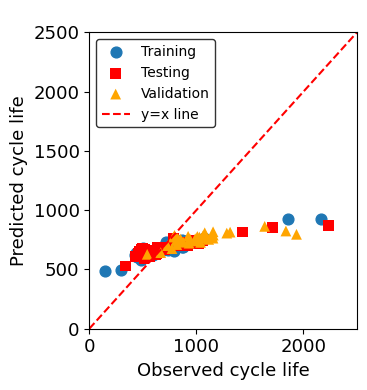

In [34]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
# plt.xticks(np.linspace(0,2,0.5,endpoint=True))
plt.ylim((0,2500))
# plt.yticks(np.linspace(0,2,0.5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Testing',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Validation',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
plt.tight_layout()
leg = plt.legend()
leg.get_frame().set_edgecolor('black')

### Optimization of Hyperparameters, e.g., alpha, and l1_ratio
$ 1/(2*n_{samples}) * ||y - Xw||^2
+ \alpha * L1_{ratio} * ||w||
+ 0.5 * \alpha * (1 - L1_{ratio}) * ||w||^2 $
1. Here I am using GridSearchCV/ElasticNetCV tools of sklearn

In [35]:
from sklearn.linear_model import ElasticNetCV

In [36]:
alpha_x=np.linspace(0.01,1,100)
l1_ratio_x=np.linspace(0,0.5,1000)

In [37]:
regr = ElasticNetCV(n_alphas=100,alphas=alpha_x,eps=0.005,l1_ratio=l1_ratio_x,cv=5, random_state=11110,max_iter=5000)
regr.fit(X_train,Y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2285318.968402135, tolerance: 529.3429897435898
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66...
       0.48298298, 0.48348348, 0.48398398, 0.48448448, 0.48498498,
       0.48548549, 0.48598599, 0.48648649, 0.48698699, 0.48748749,
       0.48798799, 0.48848849, 0.48898899, 0.48948949, 0.48998999,
       0.49049049, 0.49099099, 0.49149149, 0.49199199, 0.49249249,
       0.49299299, 0.49349349, 0.49399399, 0.49449449, 0.49499499,
       0.4954955 , 0.495996  , 0.4964965 , 0.496997  , 0.4974975 ,
       0.497998  , 0.4984985 , 0.498999  , 0.4994995 , 0.5       ]),
             max_iter=5000, random_state=11110)

In [38]:
regr

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66...
       0.48298298, 0.48348348, 0.48398398, 0.48448448, 0.48498498,
       0.48548549, 0.48598599, 0.48648649, 0.48698699, 0.48748749,
       0.48798799, 0.48848849, 0.48898899, 0.48948949, 0.48998999,
       0.49049049, 0.49099099, 0.49149149, 0.49199199, 0.49249249,
       0.49299299, 0.49349349, 0.49399399, 0.49449449, 0.49499499,
       0.4954955 , 0.495996  , 0.4964965 , 0.496997  , 0.4974975 ,
       0.497998  , 0.4984985 , 0.498999  , 0.4994995 , 0.5       ]),
             max_iter=5000, random_state=11110)

In [39]:
print(regr.alpha_)

0.01


In [40]:
print(regr.l1_ratio_)

0.5


In [41]:
regr.intercept_

-2122.9130122510373

In [42]:
regr.n_iter_

2

In [43]:
regr.dual_gap_

0.0

In [44]:
#model=Lasso(alpha=2.40)
model=ElasticNet(alpha=0.00001,l1_ratio=0.91,fit_intercept=True,tol=0.00001,max_iter=5000000,random_state=1)


In [45]:
model.fit(X_train,Y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.91, max_iter=5000000, random_state=1,
           tol=1e-05)

In [46]:
#### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 132.73878502833674
R2 score is 0.8483628642266668


In [47]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 177.15999192134402
R2 score is 0.791834590792811


In [48]:
X_val=X1[84:123]
Y_val=Y1[84:123]

In [49]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 197.16688947343818
R2 score is 0.5121202537810808


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\2507113549.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


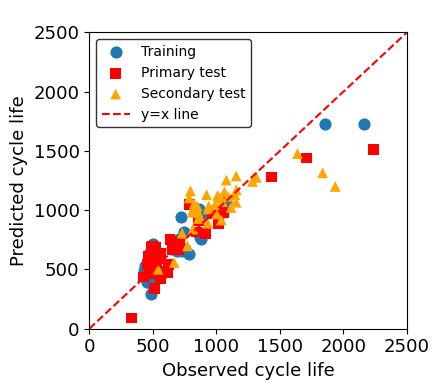

In [50]:
#### define your data plot here       
plt.figure(figsize=(4.5,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
plt.xticks(np.linspace(0,2500,6,endpoint=True))
plt.ylim((0,2500))
plt.yticks(np.linspace(0,2500,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Primary test',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Secondary test',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [52]:
first_bit= np.log10(dataset["discharge_capacity_2"])/(dataset["dq_variance"])**(1/3)

In [53]:
second_bit=(dataset["dq_variance"]**(1/3))*(dataset["dq_variance"]/dataset["dq_variance"])

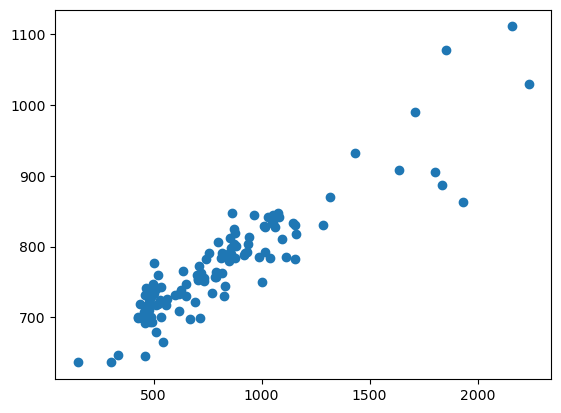

In [54]:
plt.scatter(dataset["cycle_life"], (0.3786262607E+03*first_bit)+(-0.6281856557E+02*second_bit)+0.5522646811E+03)
#plt.xlim(0,2000)
#plt.ylim(0,2000)

In [55]:
df_new= pd. DataFrame({'first_f':first_bit,
                     'second_f':second_bit,
                      })

In [56]:
Y2=dataset["cycle_life"]

In [57]:
df_new.shape

(124, 2)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new[0:82], Y2[0:82],
                                                    test_size = 0.5, random_state=1000)

In [59]:
X_val=df_new[84:123]
#X_val=X1[84:123]
Y_val=Y2[84:123]

In [60]:
model=ElasticNet(alpha=0.00001,l1_ratio=0.91,fit_intercept=True,tol=0.00001,max_iter=5000000,random_state=1)
model.fit(X_train,Y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.91, max_iter=5000000, random_state=1,
           tol=1e-05)

In [61]:
#### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 69.86534636432474
R2 score is 0.9624257681492725


In [62]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 126.0339621234447
R2 score is 0.8811943482690491


In [63]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 261.80210240648836
R2 score is 0.13981655703803098


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\2507113549.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


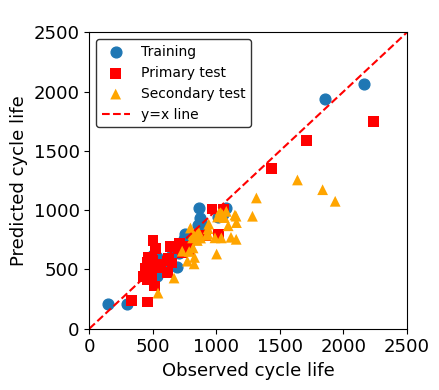

In [64]:
#### define your data plot here       
plt.figure(figsize=(4.5,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
plt.xticks(np.linspace(0,2500,6,endpoint=True))
plt.ylim((0,2500))
plt.yticks(np.linspace(0,2500,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Primary test',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Secondary test',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()

In [65]:
dataset["difference_IR_100_2"]

0     -0.000075
1     -0.000042
2     -0.000014
3      0.000039
4     -0.000053
         ...   
119   -0.000155
120   -0.000234
121   -0.000173
122   -0.000106
123   -0.000080
Name: difference_IR_100_2, Length: 124, dtype: float64

In [66]:
#4D Descriptor
onebit= (dataset["dq_min"]/dataset["dq_variance"])*np.log10(dataset["discharge_capacity_2"])
#onebit= (dataset["dq_min"]/np.log10(dataset["dq_variance"]))*np.log10(dataset["discharge_capacity_2"])

In [67]:
twobit=(dataset["dq_variance"]*dataset["slope_100_2"])/(dataset["dq_variance"]-dataset["slope_100_2"])
#twobit=(np.log10(dataset["dq_variance"])*dataset["slope_100_2"])/(np.log(dataset["dq_variance"])-dataset["slope_100_2"])

In [68]:
threebit=np.abs((dataset["ave_chg_time_5_1"]/dataset["difference_IR_100_2"])-(dataset["Integral_temp_100_2"]/dataset["difference_IR_100_2"]))

In [69]:
fourbit=(dataset["difference_IR_100_2"]/dataset["dq_variance"])/(dataset["dq_variance"]+dataset["slope_100_2"])
#fourbit=(dataset["difference_IR_100_2"]/(np.log10(dataset["dq_variance"])))/(np.log10(dataset["dq_variance"])+dataset["slope_100_2"])

In [70]:
dq_new=pd.DataFrame({'obe_bit':onebit,
                    'two_bit': twobit,
                   'three_bit':threebit,
                   'fourbit':fourbit})

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(dq_new[0:83], Y2[0:83],
                                                    test_size = 0.2, random_state=1000)

In [72]:
X_val=dq_new[84:123]
#X_val=X1[84:123]
Y_val=Y2[84:123]

In [73]:
model=ElasticNet(alpha=0.0001,l1_ratio=0.5,fit_intercept=True,tol=0.0001,max_iter=5000000,random_state=1)
from sklearn.linear_model import LinearRegression
#model=LinearRegression()
model.fit(X_train,Y_train)

ElasticNet(alpha=0.0001, max_iter=5000000, random_state=1)

In [74]:
#### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 84.34827238186018
R2 score is 0.9461475898661937


In [75]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 111.61515054109802
R2 score is 0.9022134208837613


In [76]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 331.2291173325071
R2 score is -0.37689820502578164


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_10636\2507113549.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


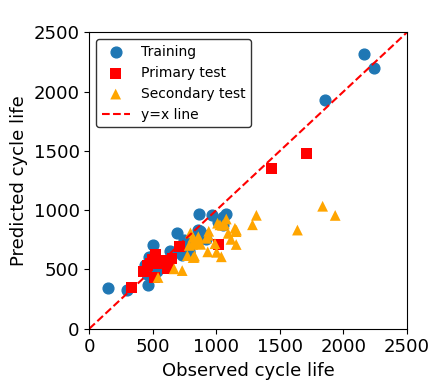

In [77]:
#### define your data plot here       
plt.figure(figsize=(4.5,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
plt.xticks(np.linspace(0,2500,6,endpoint=True))
plt.ylim((0,2500))
plt.yticks(np.linspace(0,2500,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Primary test',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Secondary test',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()